In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import tqdm

## Data import

In [3]:
# Load data

data='/Users/alessandrobreccia/Desktop/1_ANNO_MAGISTR/2_semester/LabCompB/Project/Plethysmography/data'

data_1 = pd.read_csv(data+'/1.csv', sep=',')
data_2 = pd.read_csv(data+'/2.csv', sep=',')
data_3 = pd.read_csv(data+'/3.csv', sep=',')
data_4 = pd.read_csv(data+'/4.csv', sep=',')
data_5 = pd.read_csv(data+'/5.csv', sep=',')
data_6 = pd.read_csv(data+'/6.csv', sep=',')
data_7 = pd.read_csv(data+'/7.csv', sep=',')
data_8 = pd.read_csv(data+'/8.csv', sep=',')
data_9 = pd.read_csv(data+'/9.csv', sep=',')
data_10 = pd.read_csv(data+'/10.csv', sep=',')
data_11 = pd.read_csv(data+'/11.csv', sep=',')
data_12 = pd.read_csv(data+'/12.csv', sep=',')
data_13 = pd.read_csv(data+'/13.csv', sep=',')
data_14 = pd.read_csv(data+'/14.csv', sep=',')
data_15 = pd.read_csv(data+'/15.csv', sep=',')
data_16 = pd.read_csv(data+'/16.csv', sep=',')
data_17 = pd.read_csv(data+'/17.csv', sep=',')
data_18 = pd.read_csv(data+'/18.csv', sep=',')
data_19 = pd.read_csv(data+'/19.csv', sep=',')
data_20 = pd.read_csv(data+'/20.csv', sep=',')


In [4]:

data_1[['plety','ECG']] -= data_1[['plety','ECG']].mean() 
data_1[['plety','ECG']] /= data_1[['plety','ECG']].std()
data_2[['plety','ECG']] -= data_2[['plety','ECG']].mean() 
data_2[['plety','ECG']] /= data_2[['plety','ECG']].std()
data_3[['plety','ECG']] -= data_3[['plety','ECG']].mean() 
data_3[['plety','ECG']] /= data_3[['plety','ECG']].std()
data_4[['plety','ECG']] -= data_4[['plety','ECG']].mean() 
data_4[['plety','ECG']] /= data_4[['plety','ECG']].std()
data_5[['plety','ECG']] -= data_5[['plety','ECG']].mean() 
data_5[['plety','ECG']] /= data_5[['plety','ECG']].std()
data_6[['plety','ECG']] -= data_6[['plety','ECG']].mean() 
data_6[['plety','ECG']] /= data_6[['plety','ECG']].std()
data_7[['plety','ECG']] -= data_7[['plety','ECG']].mean() 
data_7[['plety','ECG']] /= data_7[['plety','ECG']].std()
data_8[['plety','ECG']] -= data_8[['plety','ECG']].mean() 
data_8[['plety','ECG']] /= data_8[['plety','ECG']].std()
data_9[['plety','ECG']] -= data_9[['plety','ECG']].mean() 
data_9[['plety','ECG']] /= data_9[['plety','ECG']].std()
data_10[['plety','ECG']] -= data_10[['plety','ECG']].mean() 
data_10[['plety','ECG']] /= data_10[['plety','ECG']].std()
data_11[['plety','ECG']] -= data_11[['plety','ECG']].mean() 
data_11[['plety','ECG']] /= data_11[['plety','ECG']].std()
data_12[['plety','ECG']] -= data_12[['plety','ECG']].mean() 
data_12[['plety','ECG']] /= data_12[['plety','ECG']].std()
data_13[['plety','ECG']] -= data_13[['plety','ECG']].mean() 
data_13[['plety','ECG']] /= data_13[['plety','ECG']].std()
data_14[['plety','ECG']] -= data_14[['plety','ECG']].mean() 
data_14[['plety','ECG']] /= data_14[['plety','ECG']].std()
data_15[['plety','ECG']] -= data_15[['plety','ECG']].mean() 
data_15[['plety','ECG']] /= data_15[['plety','ECG']].std()
data_16[['plety','ECG']] -= data_16[['plety','ECG']].mean() 
data_16[['plety','ECG']] /= data_16[['plety','ECG']].std()
data_17[['plety','ECG']] -= data_17[['plety','ECG']].mean() 
data_17[['plety','ECG']] /= data_17[['plety','ECG']].std()
data_18[['plety','ECG']] -= data_18[['plety','ECG']].mean() 
data_18[['plety','ECG']] /= data_18[['plety','ECG']].std()
data_19[['plety','ECG']] -= data_19[['plety','ECG']].mean() 
data_19[['plety','ECG']] /= data_19[['plety','ECG']].std()
data_20[['plety','ECG']] -= data_20[['plety','ECG']].mean() 
data_20[['plety','ECG']] /= data_20[['plety','ECG']].std()

list_data=[data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8,data_9,data_10,data_11,data_12,data_13,data_14,data_15,data_16,data_17,data_18,data_19,data_20]

# LSTM performances
### We tried to use the LSTM model to reproduce the signal and check if it could be the right model for the netx task, i.e. the anomaly detection task

### Train model with one patient, both in backward and forward time orientation

In [6]:
# patient choosen
pat = list_data[2]
t, E, P = pat['time'].to_numpy(), pat['ECG'].to_numpy(), pat['plety'].to_numpy()
data = np.column_stack(( P, E ))

# Boolean variable to allow prediction in reverse
models =[True,False]
epochs = 20

for reverse in models:
        # Length of the sequence, tunable
        sequence_length = 50
        X = []
        y = []
        for i in range(len(data) - sequence_length):
                X.append(data[i:i+sequence_length, :])
                y.append(data[i+sequence_length, 0])
        X = np.array(X)
        y = np.array(y)
        
        # split data into training and testing sets
        train_size = int(len(X) * 0.5)
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        val_size = int(len(X_train) * 0.8)
        X_train, X_val = X[:val_size], X[:val_size]
        y_train, y_val = y[:val_size], y[:val_size] 

        if reverse:
                # create and train LSTM model
                model_r = Sequential(name="Reverse")
                model_r.add(LSTM(50, input_shape=(X.shape[1],X.shape[2])))
                model_r.add(Dense(1))
                model_r.compile(loss='mean_squared_error', optimizer='adam')
                lstm_r = model_r.fit(X_train[::-1], y_train[::-1], epochs=epochs, batch_size=32, validation_data=(X_val,y_val), use_multiprocessing=True )
                model_r.summary()
                
        else:
               # create and train LSTM model
                model = Sequential(name="Normal")
                model.add(LSTM(50, input_shape=(X.shape[1],X.shape[2])))
                model.add(Dense(1))
                model.compile(loss='mean_squared_error', optimizer='adam')
                lstm = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_val,y_val), use_multiprocessing=True )
                model.summary()


2023-07-09 11:46:32.412256: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
58/58 [==============================] - 8s 62ms/step - loss: 0.3031 - val_loss: 0.1006
Epoch 2/20
58/58 [==============================] - 3s 46ms/step - loss: 0.0771 - val_loss: 0.0551
Epoch 3/20
58/58 [==============================] - 3s 44ms/step - loss: 0.0448 - val_loss: 0.0318
Epoch 4/20
58/58 [==============================] - 2s 40ms/step - loss: 0.0252 - val_loss: 0.0189
Epoch 5/20
58/58 [==============================] - 3s 46ms/step - loss: 0.0139 - val_loss: 0.0087
Epoch 6/20
58/58 [==============================] - 3s 44ms/step - loss: 0.0069 - val_loss: 0.0043
Epoch 7/20
58/58 [==============================] - 3s 47ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 8/20
58/58 [==============================] - 3s 52ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 9/20
58/58 [==============================] - 3s 45ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 10/20
58/58 [==============================] - 2s 42ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 11/

### Loss function

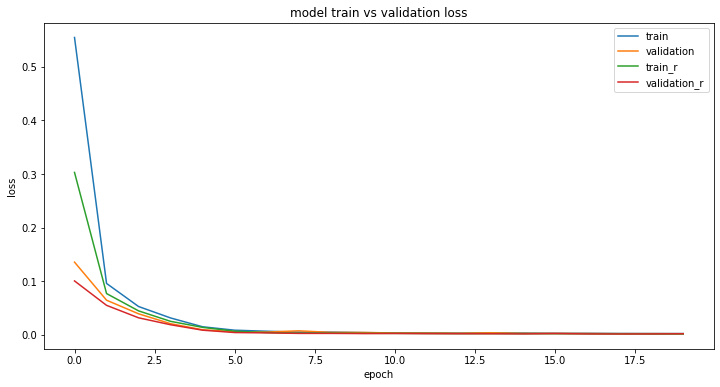

In [7]:
fig = plt.figure(figsize=(12,6))
plt.plot(lstm.history['loss'], label='Train loss' )
plt.plot(lstm.history['val_loss'],label='Validation loss' )
plt.plot(lstm_r.history['loss'],label='Train loss (Rev)' )
plt.plot(lstm_r.history['val_loss'],label='Validation loss (Rev)' )
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation','train_r','validation_r'], loc='upper right')
plt.show()

### Testing on different patient, both backward and forward 

In [8]:
# patient chosen
pat = data_11
t, E, P = pat['time'].to_numpy(), pat['ECG'].to_numpy(), pat['plety'].to_numpy()
data = np.column_stack(( P, E ))

# create input/output sequences for LSTM
X = []
y = []
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length, :])
    y.append(data[i+sequence_length,0])
X = np.array(X)
y = np.array(y)

y_pred = model.predict(X)
y_pred_r = model_r.predict(X[::-1])
#y_pred_r = model_r.predict(X)


244/244 [==============================] - 4s 13ms/step


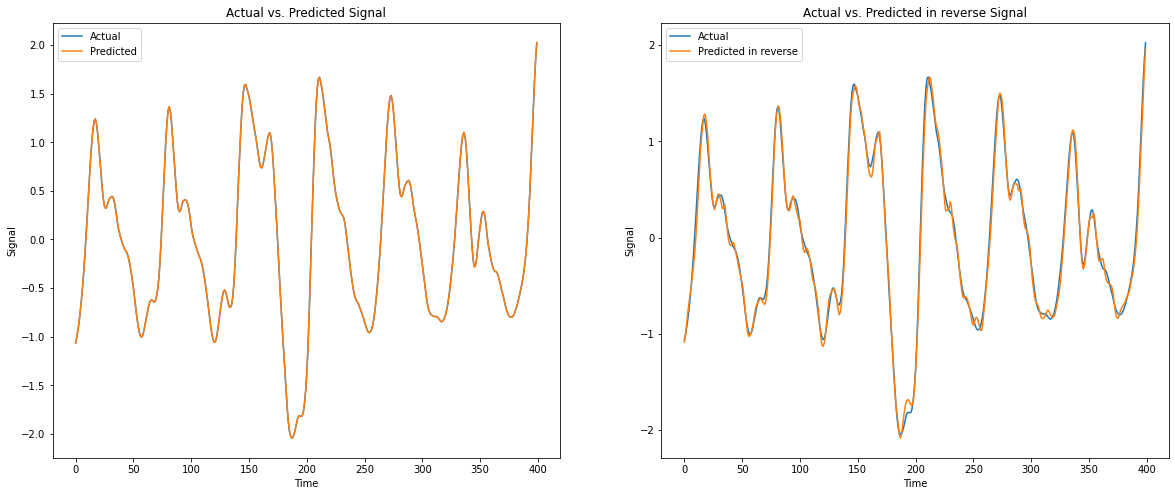

In [9]:

# plot actual vs predicted signals
limit= 400

fig , ax = plt.subplots(1,2, figsize= (20,8))
ax[0].plot(y[:limit], label='Actual')
ax[0].plot(y[:limit], label='Predicted')
ax[0].legend()
ax[0].set_title('Actual vs. Predicted Signal')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Signal')

ax[1].plot(y[:limit], label='Actual')
ax[1].plot(y_pred_r[:len(y_pred_r)-limit-1:-1], label='Predicted in reverse')
#ax[1].plot(y_test[:limit], label='Actual')
#ax[1].plot(y_pred_r[:limit], label='Predicted in reverse')

ax[1].legend()
ax[1].set_title('Actual vs. Predicted in reverse Signal')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Signal')
plt.show()

## Anomaly detection LSTM

### We used a LSTM to detect spikes and strange behaviours in the plety signal

One way to do this is to develop quantile regression. We focus on predictions of extreme values: lower (10th quantile), upper (90th quantile) and the classical 50th quantile. Computing also the 90th and 10th quantile we cover the most likely values the reality can assume. The width of this range can be very depth; we know that it is small when our model is sure about the future and it can be huge when our model isn’t able to see important changes in the domain of interest. We are expecting to get a tiny interval (90–10 quantile range) when our model is sure about the future because it has all under control; on the other hand, we are expecting to get an anomaly when the interval becomes bigger. 

# Models Definition

In [31]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
import tqdm
import plotly.graph_objects as go

def q_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

def My_B_Lstm_AD(input_shape, size1, size2):
        inputs = keras.layers.Input(shape=input_shape, name='Input')
        #inputs = keras.layers.Input(shape=(X_train.shape[1],1))
        lstm = keras.layers.Bidirectional(LSTM(size1, return_sequences=True, dropout=0.1, name='LSTM'))(inputs, training = True)
        flat = keras.layers.Flatten()(lstm)
        #lstm = keras.layers.Bidirectional(LSTM(size2, return_sequences=False, dropout= 0.01 ))(lstm, training = True)
        dense = Dense(50, name='Dense')(flat, training = True)
        out01 = Dense(1, name='Quant10')(dense)
        out09 = Dense(1, name='Quant90')(dense)
        p = Dense(1, name='Pred')(dense)
        model = keras.Model(inputs, [out01,out09, p])
        model.summary()
        losses = [lambda  y,f: q_loss(0.1,y,f), lambda y,f: q_loss(0.9,y,f), "mae"]
        model.compile(loss= losses , optimizer='adam', loss_weights = [0.33,0.33,0.33])

        return model

def My_Lstm_AD(input_shape, size1, size2):
        inputs = keras.layers.Input(shape=input_shape)
        #inputs = keras.layers.Input(shape=(X_train.shape[1],1))
        lstm = keras.layers.LSTM(size1, return_sequences=True, dropout=0.01)(inputs, training = True)
        lstm2 = keras.layers.LSTM(size2, return_sequences=False, dropout= 0.01 )(lstm, training = True)
        dense = Dense(50)(lstm2, training = True)
        out01 = Dense(1)(dense)
        out09 = Dense(1)(dense)
        p = Dense(1)(dense)
        model = keras.Model(inputs, [out01,out09, p])
        model.summary()
        losses = [lambda  y,f: q_loss(0.1,y,f), lambda y,f: q_loss(0.9,y,f), "mae"]
        model.compile(loss= losses , optimizer='adam', loss_weights = [0.33,0.33,0.33])

        return model

def detect(X_test,n, plot, model):
        pred_10, pred_50, pred_90 = [], [], []

        for i in tqdm.tqdm(range(0,n)):
            predd = model.predict(X_test)
            pred_10.append(predd[0])
            pred_50.append(predd[1])
            pred_90.append(predd[2])

        pred_10 = np.asarray(pred_10)[:,:,0] 
        pred_50 = np.asarray(pred_50)[:,:,0]
        pred_90 = np.asarray(pred_90)[:,:,0]  

        pred_90_m = np.quantile(pred_90,0.9,axis=0) 
        pred_50_m = pred_50.mean(axis=0)
        pred_10_m = np.quantile(pred_10,0.1,axis=0)
        
        if plot:
            fig = plt.figure(figsize=(20,8))
            low_limit = 0
            up_limit = 800
            plt.plot(pred_10_m[low_limit:up_limit], label = "quantile 01")
            plt.plot(pred_90_m[low_limit:up_limit], label = "quantile 09")
            plt.plot(pred_50_m[low_limit:up_limit], label = "Prediction")        
            plt.plot(y_test[low_limit:up_limit], label = "signal" )
            plt.legend()
            plt.show()

            fig = plt.figure(figsize=(20,8))
            low_limit = 0
            up_limit = min(2500,len(pred_10_m))
            #plt.plot(np.log(abs(-y_pred_01[0][low_limit:up_limit]+y_pred_01[1][low_limit:up_limit])), marker ='o', markersize = 2 ,label = "quantile diff")      
            plt.plot(abs(-pred_10_m[low_limit:up_limit]+pred_90_m[low_limit:up_limit]), marker ='o', markersize = 2 ,label = "quantile diff")      
            plt.plot(y_test[low_limit:up_limit], label = "signal" , color='purple')
            plt.legend()
            plt.show()

        return pred_10_m, pred_50_m, pred_90_m

# Data splittig (train/test)

In [22]:
def data_split_train_test(pat_data, size , seq_len, OP):

    E, P = pat_data['ECG'].to_numpy(), pat_data['plety'].to_numpy()
    # Only plety
    if OP:
        data = P
        sequence_length = seq_len
        X = []
        y = []
        for i in range(len(P) - sequence_length):
            X.append(data[i:i+sequence_length])
            y.append(data[i+sequence_length])
        X = np.array(X)
        y = np.array(y)
    # Plety and ECG    
    else:
        data = np.column_stack(( P, E ))
        sequence_length = seq_len
        X = []
        y = []
        for i in range(len(P) - sequence_length):
            X.append(data[i:i+sequence_length,:])
            y.append(data[i+sequence_length,0])
        X = np.array(X)
        y = np.array(y)

    train_size = int(len(X) * size)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    return X_train, X_test, y_train, y_test

def split_2pat(data1,size1,data2,size2, seq_len, OP):
    X_train1, X_test1, y_train1, y_test1 = data_split_train_test(data1, size1 , seq_len, OP)
    X_train2, X_test2, y_train2, y_test2 = data_split_train_test(data2, size2 , seq_len, OP)

    return X_train1, X_test2, y_train1, y_test2

In [32]:

X_train, X_test, y_train, y_test = split_2pat(data_1, 0.9, data_11, 0.1, 10, False)

#inp = (np.shape(X_train)[1],1)
inp = (X_train.shape[1],X_train.shape[2])

model = My_B_Lstm_AD( inp , 64 , 32)

hist = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 10, 2)]              0         []                            
                                                                                                  
 bidirectional_5 (Bidirecti  (None, 10, 128)              34304     ['Input[0][0]']               
 onal)                                                                                            
                                                                                                  
 flatten_4 (Flatten)         (None, 1280)                 0         ['bidirectional_5[0][0]']     
                                                                                                  
 Dense (Dense)               (None, 50)                   64050     ['flatten_4[0][0]']     

In [28]:
X_train, X_test, y_train, y_test = data_split_train_test(data_11, 0.1, 10, False)

quant10, quant50, quant90 =  detect(X_test, 100, False, model)

  0%|          | 0/100 [00:00<?, ?it/s]

221/221 [==============================] - 1s 2ms/step


  1%|          | 1/100 [00:00<01:10,  1.41it/s]

221/221 [==============================] - 0s 837us/step


  2%|▏         | 2/100 [00:00<00:43,  2.26it/s]

221/221 [==============================] - 0s 883us/step


  3%|▎         | 3/100 [00:01<00:35,  2.76it/s]

221/221 [==============================] - 0s 822us/step


  4%|▍         | 4/100 [00:01<00:30,  3.14it/s]

221/221 [==============================] - 0s 821us/step


  5%|▌         | 5/100 [00:01<00:27,  3.41it/s]

221/221 [==============================] - 0s 2ms/step


  6%|▌         | 6/100 [00:02<00:36,  2.57it/s]

221/221 [==============================] - 1s 2ms/step


  7%|▋         | 7/100 [00:02<00:42,  2.21it/s]

221/221 [==============================] - 0s 1ms/step


  8%|▊         | 8/100 [00:03<00:37,  2.48it/s]

221/221 [==============================] - 0s 967us/step


  9%|▉         | 9/100 [00:03<00:33,  2.73it/s]

221/221 [==============================] - 0s 1ms/step


 10%|█         | 10/100 [00:03<00:31,  2.87it/s]

221/221 [==============================] - 0s 966us/step


 11%|█         | 11/100 [00:04<00:29,  3.04it/s]

221/221 [==============================] - 0s 971us/step


 12%|█▏        | 12/100 [00:04<00:27,  3.16it/s]

221/221 [==============================] - 0s 974us/step


 13%|█▎        | 13/100 [00:04<00:26,  3.25it/s]

221/221 [==============================] - 0s 972us/step


 14%|█▍        | 14/100 [00:04<00:25,  3.32it/s]

221/221 [==============================] - 0s 977us/step


 15%|█▌        | 15/100 [00:05<00:25,  3.36it/s]

221/221 [==============================] - 0s 1ms/step


 16%|█▌        | 16/100 [00:05<00:25,  3.33it/s]

221/221 [==============================] - 0s 977us/step


 17%|█▋        | 17/100 [00:05<00:24,  3.37it/s]

221/221 [==============================] - 0s 973us/step


 18%|█▊        | 18/100 [00:06<00:24,  3.40it/s]

221/221 [==============================] - 0s 975us/step


 19%|█▉        | 19/100 [00:06<00:23,  3.43it/s]

221/221 [==============================] - 0s 973us/step


 20%|██        | 20/100 [00:06<00:23,  3.45it/s]

221/221 [==============================] - 0s 978us/step


 21%|██        | 21/100 [00:06<00:22,  3.45it/s]

221/221 [==============================] - 0s 970us/step


 22%|██▏       | 22/100 [00:07<00:22,  3.46it/s]

221/221 [==============================] - 0s 1ms/step


 23%|██▎       | 23/100 [00:07<00:22,  3.40it/s]

221/221 [==============================] - 0s 963us/step


 24%|██▍       | 24/100 [00:07<00:22,  3.43it/s]

221/221 [==============================] - 0s 977us/step


 25%|██▌       | 25/100 [00:08<00:21,  3.44it/s]

221/221 [==============================] - 0s 968us/step


 26%|██▌       | 26/100 [00:08<00:21,  3.46it/s]

221/221 [==============================] - 0s 975us/step


 27%|██▋       | 27/100 [00:08<00:21,  3.46it/s]

221/221 [==============================] - 0s 964us/step


 28%|██▊       | 28/100 [00:08<00:20,  3.48it/s]

221/221 [==============================] - 0s 986us/step


 29%|██▉       | 29/100 [00:09<00:20,  3.47it/s]

221/221 [==============================] - 0s 1ms/step


 30%|███       | 30/100 [00:09<00:20,  3.41it/s]

221/221 [==============================] - 0s 966us/step


 31%|███       | 31/100 [00:09<00:20,  3.44it/s]

221/221 [==============================] - 0s 974us/step


 32%|███▏      | 32/100 [00:10<00:19,  3.46it/s]

221/221 [==============================] - 0s 984us/step


 33%|███▎      | 33/100 [00:10<00:19,  3.45it/s]

221/221 [==============================] - 0s 968us/step


 34%|███▍      | 34/100 [00:10<00:19,  3.47it/s]

221/221 [==============================] - 0s 984us/step


 35%|███▌      | 35/100 [00:11<00:18,  3.46it/s]

221/221 [==============================] - 0s 1ms/step


 36%|███▌      | 36/100 [00:11<00:18,  3.42it/s]

221/221 [==============================] - 0s 1ms/step


 37%|███▋      | 37/100 [00:11<00:18,  3.41it/s]

221/221 [==============================] - 0s 962us/step


 38%|███▊      | 38/100 [00:11<00:17,  3.44it/s]

221/221 [==============================] - 0s 975us/step


 39%|███▉      | 39/100 [00:12<00:17,  3.46it/s]

221/221 [==============================] - 0s 978us/step


 40%|████      | 40/100 [00:12<00:17,  3.46it/s]

221/221 [==============================] - 0s 971us/step


 41%|████      | 41/100 [00:12<00:17,  3.47it/s]

221/221 [==============================] - 0s 1ms/step


 42%|████▏     | 42/100 [00:13<00:16,  3.43it/s]

221/221 [==============================] - 0s 966us/step


 43%|████▎     | 43/100 [00:13<00:16,  3.45it/s]

221/221 [==============================] - 0s 992us/step


 44%|████▍     | 44/100 [00:13<00:16,  3.45it/s]

221/221 [==============================] - 0s 974us/step


 45%|████▌     | 45/100 [00:13<00:15,  3.46it/s]

221/221 [==============================] - 0s 982us/step


 46%|████▌     | 46/100 [00:14<00:15,  3.47it/s]

221/221 [==============================] - 0s 984us/step


 47%|████▋     | 47/100 [00:14<00:15,  3.47it/s]

221/221 [==============================] - 0s 1ms/step


 48%|████▊     | 48/100 [00:14<00:15,  3.41it/s]

221/221 [==============================] - 0s 971us/step


 49%|████▉     | 49/100 [00:15<00:14,  3.43it/s]

221/221 [==============================] - 0s 989us/step


 50%|█████     | 50/100 [00:15<00:14,  3.44it/s]

221/221 [==============================] - 0s 978us/step


 51%|█████     | 51/100 [00:15<00:14,  3.45it/s]

221/221 [==============================] - 0s 969us/step


 52%|█████▏    | 52/100 [00:15<00:13,  3.46it/s]

221/221 [==============================] - 0s 982us/step


 53%|█████▎    | 53/100 [00:16<00:13,  3.46it/s]

221/221 [==============================] - 0s 985us/step


 54%|█████▍    | 54/100 [00:16<00:13,  3.46it/s]

221/221 [==============================] - 0s 1ms/step


 55%|█████▌    | 55/100 [00:16<00:13,  3.38it/s]

221/221 [==============================] - 0s 961us/step


 56%|█████▌    | 56/100 [00:17<00:12,  3.43it/s]

221/221 [==============================] - 0s 984us/step


 57%|█████▋    | 57/100 [00:17<00:12,  3.44it/s]

221/221 [==============================] - 0s 984us/step


 58%|█████▊    | 58/100 [00:17<00:12,  3.45it/s]

221/221 [==============================] - 0s 1ms/step


 59%|█████▉    | 59/100 [00:17<00:11,  3.43it/s]

221/221 [==============================] - 0s 958us/step


 60%|██████    | 60/100 [00:18<00:11,  3.46it/s]

221/221 [==============================] - 0s 983us/step


 61%|██████    | 61/100 [00:18<00:11,  3.46it/s]

221/221 [==============================] - 0s 1ms/step


 62%|██████▏   | 62/100 [00:18<00:11,  3.39it/s]

221/221 [==============================] - 0s 965us/step


 63%|██████▎   | 63/100 [00:19<00:10,  3.42it/s]

221/221 [==============================] - 0s 969us/step


 64%|██████▍   | 64/100 [00:19<00:10,  3.45it/s]

221/221 [==============================] - 0s 962us/step


 65%|██████▌   | 65/100 [00:19<00:10,  3.47it/s]

221/221 [==============================] - 0s 974us/step


 66%|██████▌   | 66/100 [00:20<00:09,  3.47it/s]

221/221 [==============================] - 0s 983us/step


 67%|██████▋   | 67/100 [00:20<00:09,  3.47it/s]

221/221 [==============================] - 0s 968us/step


 68%|██████▊   | 68/100 [00:20<00:09,  3.48it/s]

221/221 [==============================] - 0s 1ms/step


 69%|██████▉   | 69/100 [00:20<00:09,  3.40it/s]

221/221 [==============================] - 0s 966us/step


 70%|███████   | 70/100 [00:21<00:08,  3.44it/s]

221/221 [==============================] - 0s 987us/step


 71%|███████   | 71/100 [00:21<00:08,  3.44it/s]

221/221 [==============================] - 0s 974us/step


 72%|███████▏  | 72/100 [00:21<00:08,  3.46it/s]

221/221 [==============================] - 0s 967us/step


 73%|███████▎  | 73/100 [00:22<00:07,  3.47it/s]

221/221 [==============================] - 0s 1ms/step


 74%|███████▍  | 74/100 [00:22<00:07,  3.44it/s]

221/221 [==============================] - 0s 963us/step


 75%|███████▌  | 75/100 [00:22<00:07,  3.46it/s]

221/221 [==============================] - 0s 973us/step


 76%|███████▌  | 76/100 [00:22<00:06,  3.47it/s]

221/221 [==============================] - 0s 976us/step


 77%|███████▋  | 77/100 [00:23<00:06,  3.47it/s]

221/221 [==============================] - 0s 969us/step


 78%|███████▊  | 78/100 [00:23<00:06,  3.48it/s]

221/221 [==============================] - 0s 968us/step


 79%|███████▉  | 79/100 [00:23<00:06,  3.48it/s]

221/221 [==============================] - 0s 982us/step


 80%|████████  | 80/100 [00:24<00:05,  3.48it/s]

221/221 [==============================] - 0s 1ms/step


 81%|████████  | 81/100 [00:24<00:05,  3.45it/s]

221/221 [==============================] - 0s 975us/step


 82%|████████▏ | 82/100 [00:24<00:05,  3.46it/s]

221/221 [==============================] - 0s 971us/step


 83%|████████▎ | 83/100 [00:24<00:04,  3.47it/s]

221/221 [==============================] - 0s 981us/step


 84%|████████▍ | 84/100 [00:25<00:04,  3.47it/s]

221/221 [==============================] - 0s 961us/step


 85%|████████▌ | 85/100 [00:25<00:04,  3.48it/s]

221/221 [==============================] - 0s 968us/step


 86%|████████▌ | 86/100 [00:25<00:04,  3.49it/s]

221/221 [==============================] - 0s 981us/step


 87%|████████▋ | 87/100 [00:26<00:03,  3.48it/s]

221/221 [==============================] - 0s 981us/step


 88%|████████▊ | 88/100 [00:26<00:03,  3.47it/s]

221/221 [==============================] - 0s 971us/step


 89%|████████▉ | 89/100 [00:26<00:03,  3.47it/s]

221/221 [==============================] - 0s 976us/step


 90%|█████████ | 90/100 [00:26<00:02,  3.48it/s]

221/221 [==============================] - 0s 1ms/step


 91%|█████████ | 91/100 [00:27<00:02,  3.42it/s]

221/221 [==============================] - 0s 957us/step


 92%|█████████▏| 92/100 [00:27<00:02,  3.45it/s]

221/221 [==============================] - 0s 978us/step


 93%|█████████▎| 93/100 [00:27<00:02,  3.45it/s]

221/221 [==============================] - 0s 974us/step


 94%|█████████▍| 94/100 [00:28<00:01,  3.46it/s]

221/221 [==============================] - 0s 974us/step


 95%|█████████▌| 95/100 [00:28<00:01,  3.46it/s]

221/221 [==============================] - 0s 965us/step


 96%|█████████▌| 96/100 [00:28<00:01,  3.48it/s]

221/221 [==============================] - 0s 980us/step


 97%|█████████▋| 97/100 [00:28<00:00,  3.48it/s]

221/221 [==============================] - 0s 986us/step


 98%|█████████▊| 98/100 [00:29<00:00,  3.48it/s]

221/221 [==============================] - 0s 976us/step


 99%|█████████▉| 99/100 [00:29<00:00,  3.47it/s]

221/221 [==============================] - 0s 997us/step


100%|██████████| 100/100 [00:29<00:00,  3.35it/s]


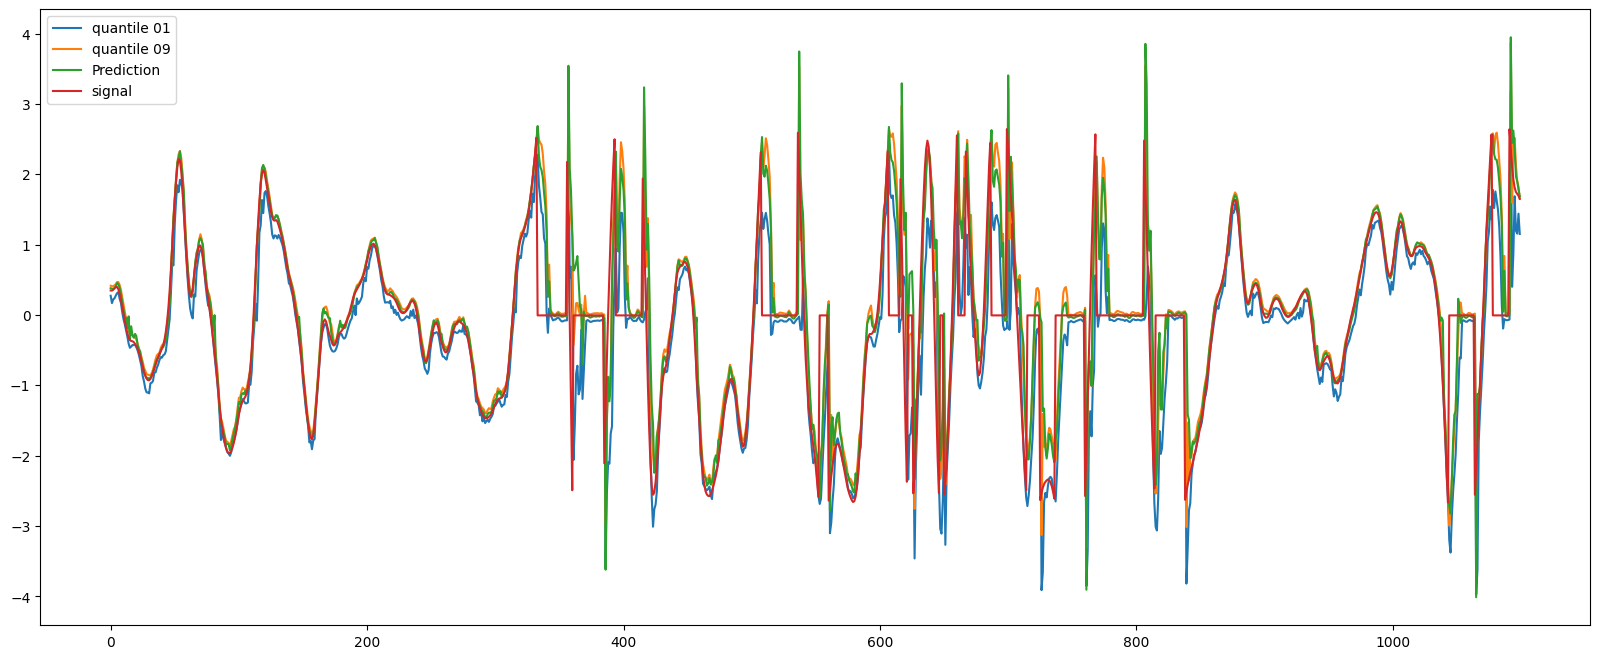

In [29]:
fig = plt.figure(figsize=(20,8))
low_limit = 1500
up_limit = 2600

plt.plot(quant10[low_limit:up_limit], label = "quantile 01")
plt.plot(quant50[low_limit:up_limit], label = "quantile 09")
plt.plot(quant90[low_limit:up_limit], label = "Prediction")        
#plt.plot(y_test[low_limit:up_limit]-quant50[low_limit:up_limit], label = "signal" )
plt.plot(y_test[low_limit:up_limit], label = "signal" )
#plt.plot(y_test[low_limit:up_limit]-quant50[low_limit:up_limit], label = "signal" )

plt.legend()
plt.show()

In [30]:

fig = go.Figure()
fig.add_trace(go.Scatter(x= np.arange(0,len(y_test),1), y= y_test, name='Data'))


diff_quant = abs(quant10-quant90)
diff_pred = abs(y_test-quant50)

mask = diff_quant+diff_pred > np.max(diff_quant+diff_pred)/2
print("Detected with both prediction and quantiles", np.shape(np.where(mask==1))[1] , "anomalies")

fig.add_trace(go.Scatter(x= np.reshape(np.where(mask==1) , (np.shape(np.where(mask==1))[1]) ), y= y_test[mask], name='Total Anomaly', mode='markers', marker = dict(color="red", size = 10, opacity=0.7)))
fig.update_layout(showlegend=True, title='Anomaly detection')




mask = diff_quant > np.max(diff_quant)/2
print("Detected with quantiles", np.shape(np.where(mask==1))[1] , "anomalies")

fig.add_trace(go.Scatter(x= np.reshape(np.where(mask==1) , (np.shape(np.where(mask==1))[1]) ), y= y_test[mask], name='Quantile Anomaly', mode='markers', marker = dict(color="green", symbol='star', opacity=0.9, size = 10)))
fig.update_layout(showlegend=True, title='Anomaly detection')




mask = diff_pred > np.max(diff_pred)/2
print("Detected with prediction", np.shape(np.where(mask==1))[1] , "anomalies")

fig.add_trace(go.Scatter(x= np.reshape(np.where(mask==1) , (np.shape(np.where(mask==1))[1]) ), y= y_test[mask], name='Prediction Anomaly', mode='markers', marker = dict(color="orange", symbol='square',opacity=0.9)))


fig.update_layout(showlegend=True, title='Anomaly detection')
fig.show()

Detected with both prediction and quantiles 112 anomalies
Detected with quantiles 51 anomalies
Detected with prediction 234 anomalies


## Future optimizations

### Inspect the auto correlation function of the data, with the aim to choose the best sequence length

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import rcParams

step=67
data = data_11[['time','plety']]
timeLags = np.arange(1,len(data['plety']),step)
autoCorr = [data['plety'].autocorr(lag=dt) for dt in timeLags]

plt.figure(figsize=(20,8))
plt.plot(timeLags, autoCorr)
#plt.plot(data)
plt.xlabel('time lag')
plt.ylabel('correlation coeff', fontsize=12)

In [ ]:
import tqdm
s = np.array([])
data = data_6['plety']
for i in tqdm.tqdm(np.arange(1,600,1)):
    step=i
    timeLags = np.arange(1,len(data),step)
    autoCorr = [data.autocorr(lag=dt) for dt in timeLags]
    s = np.append(s,np.mean(autoCorr))
plt.figure(figsize=(20,8))    
plt.plot(s)

#### Frequencies of the peaks

In [ ]:
print(np.where(s<-0.08))
print(np.diff(np.where(s<-0.08)))